<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<hr>

# Aura OMI - Nitrogen Dioxide (NO2)

This notebook provides you an introduction to data from the [Ozone Monitoring Instrument (OMI)](https://aura.gsfc.nasa.gov/omi.html), which is onboard the Aura mission. According to NASA, OMI "can distinguish between aerosol types, such as smoke, dust, and sulfates, and measures cloud pressure and coverage, which provides data to derive tropospheric ozone.

The OMI instrument employs hyperspectral imaging in a push-broom mode to observe solar backscatter radiation in the visible and ultraviolet. The hyperspectral capabilities improve the accuracy and precision of the total ozone amounts and also allow for accurate radiometric and wavelength self calibration over the long term."

This notebook shows the structure of `OMI/Aura Nitrogen Dioxide (NO2) Total and Tropospheric Column 1-orbit L2 Swath 13x24 km V003 (OMNO2)` data and what information of the data files can be used in order to load, browse and visualize the data. 

The OMNO2 dataset can be ordered via the [GES DISC](https://disc.gsfc.nasa.gov/datasets/OMNO2_003/summary?keywords=OMNO2) and are distributed in `HDF-EOS5` format. You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) before being able to download data.



<hr>

##### Load required libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from netCDF4 import Dataset
import pandas as pd
import glob

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### Load and browse OMI data

We first define the path to the `he5` or `hdf5` data file. This data example is from 15 September 2020.

In [4]:
file_path = '../eodata/omi/OMI-Aura_L2-OMNO2_2020m0915t0610-o86006_v003-2020m1102t135902.he5'

Next, we use the library `h5py` to open the `hdf5` file. Learn more about [h5py](https://docs.h5py.org/en/stable/).
`'r'` means that `hdf5` file is open in read-only mode.

In [6]:
file = h5py.File(file_path, 'r') 
file

<HDF5 file "OMI-Aura_L2-OMNO2_2020m0915t0610-o86006_v003-2020m1102t135902.he5" (mode r)>

Next, we access the data tree in the `hdf5` file and extract information such as the data and geolocation fields. We can also get useful information for mapping such as the `SDS_NAME` for the title and `Units` to use as a map label.

In [7]:
dataFields=file['HDFEOS']['SWATHS']['ColumnAmountNO2']['Data Fields']
geolocation=file['HDFEOS']['SWATHS']['ColumnAmountNO2']['Geolocation Fields']
SDS_NAME='ColumnAmountNO2'
data=dataFields[SDS_NAME]
map_label=data.attrs['Units'].decode()

Next, we can get necessary attributes such as the `_FillValue` and `MissingValue` for the data. We also can extract the `Offset` and `ScaleFactor` to transform the data later.

In [10]:
fv=data.attrs['_FillValue']
mv=data.attrs['MissingValue']
offset=data.attrs['Offset']
scale=data.attrs['ScaleFactor']

We also need the latitude and longitude information to georeference and plot the data. Using the library `numpy`, we can calculate the minimum and maximum latitude and longitude.

In [11]:
lat=geolocation['Latitude'][:]
min_lat=np.min(lat)
max_lat=np.max(lat)
lon=geolocation['Longitude'][:]
min_lon=np.min(lon)
max_lon=np.max(lon)

Next, we can get the data as an array and mask the fill/missing values. 

In [12]:
dataArray=data[:]
dataArray[dataArray==fv]=np.nan
dataArray[dataArray==mv]=np.nan

We then use the scale factor and offset to transform the data.

In [15]:
dataArray = scale * (dataArray - offset)

We can also use the library `numpy` to get statistics about data. This could include the average, standard deviation, median, as well as the maximum and minimum values (excluding any `NaN` values).

In [16]:
average=np.nanmean(dataArray)
stdev=np.nanstd(dataArray)
median=np.nanmedian(dataArray)
data_min = np.nanmin(dataArray)
data_max = np.nanmax(dataArray)

#print statistics 
print('The average of this data is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3),\
      '\nThe median is: ',round(median,3),\
      '\nThe maximum value is: ',round(data_max,3),'\nThe minimum value is: ',round(data_min,3))
print('The range of latitude in this file is: ',min_lat,' to ',max_lat, \
      'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')

The average of this data is:  2690907000000000.0 
The standard deviation is:  1227003600000000.0 
The median is:  2690688000000000.0 
The maximum value is:  1.9168596e+16 
The minimum value is:  -9426907000000000.0
The range of latitude in this file is:  -89.71353  to  89.90025 degrees 
The range of longitude in this file is:  -179.99821  to  179.99463  degrees


### Plotting example - OMI Nitrogen Dioxide Level 2 data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

For visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) function and visualize the vertically integrated nitrogen dioxide column recorded by the Sentinel-5P satellite on 15 September 2020.

Note: Multiplying the vmax values with 1e<sup>+15</sup> improves the readibility of the map legend.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'OMI ColumnAmountNO2'}>)

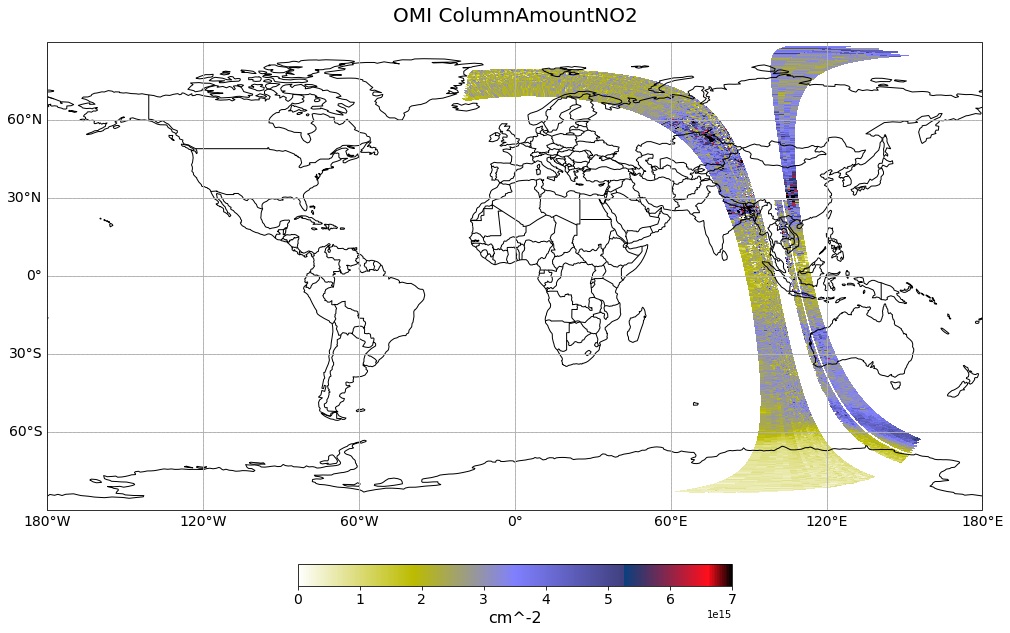

In [19]:
visualize_pcolormesh(data_array=dataArray,
                     longitude=lon,
                     latitude=lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='gist_stern_r',
                     unit=map_label,
                     long_name='OMI ' + SDS_NAME,
                     vmin=0, 
                     vmax=7*1e+15,
                     lonmin=min_lon,
                     lonmax=max_lon,
                     latmin=min_lat,
                     latmax=max_lat,
                     set_global=True)

Elevated levels of nitrogen dioxide can be seen over China.

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>